In [1]:
import pandas as pd
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import plotly.express as px
import plotly.graph_objs as go
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('DF_VF.csv')
df.head()

,ID,count,Paid,Ratio,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DAYS_BIRTH_CLEAN,Letter,Main_ID,New_ID,ADDRESS
0,5008804,15,13.0,0.866667,M,Y,Y,0.0,427500.0,Working,...,1.0,0.0,0.0,NaN,2.0,09/04/1990,L,5008804,5008804,"06042, CT, 31 Mitchell Road"
1,5008804,15,13.0,0.866667,F,N,Y,1.0,90000.0,State servant,...,0.0,0.0,0.0,Medicine staff,3.0,07/06/1984,L,5008804,5008804,"06042, CT, 31 Mitchell Road"
2,5008805,14,12.0,0.857143,M,Y,Y,0.0,427500.0,Working,...,1.0,0.0,0.0,NaN,2.0,09/04/1990,G,5008805,5008805,"72703, AR, 1189 Northwest End Avenue"
3,5008805,14,12.0,0.857143,M,N,Y,0.0,180000.0,Working,...,0.0,0.0,0.0,Sales staff,2.0,21/02/1995,G,5008805,5008805,"72703, AR, 1189 Northwest End Avenue"
4,5008806,14,7.0,0.500000,M,Y,Y,0.0,112500.0,Working,...,0.0,0.0,0.0,Security staff,2.0,06/05/1964,D,5008806,5008806,"72701, AR, 218 Shipley Alley"


In [3]:
df.fillna(0)
df.head()

,ID,count,Paid,Ratio,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DAYS_BIRTH_CLEAN,Letter,Main_ID,New_ID,ADDRESS
0,5008804,15,13.0,0.866667,M,Y,Y,0.0,427500.0,Working,...,1.0,0.0,0.0,NaN,2.0,09/04/1990,L,5008804,5008804,"06042, CT, 31 Mitchell Road"
1,5008804,15,13.0,0.866667,F,N,Y,1.0,90000.0,State servant,...,0.0,0.0,0.0,Medicine staff,3.0,07/06/1984,L,5008804,5008804,"06042, CT, 31 Mitchell Road"
2,5008805,14,12.0,0.857143,M,Y,Y,0.0,427500.0,Working,...,1.0,0.0,0.0,NaN,2.0,09/04/1990,G,5008805,5008805,"72703, AR, 1189 Northwest End Avenue"
3,5008805,14,12.0,0.857143,M,N,Y,0.0,180000.0,Working,...,0.0,0.0,0.0,Sales staff,2.0,21/02/1995,G,5008805,5008805,"72703, AR, 1189 Northwest End Avenue"
4,5008806,14,7.0,0.500000,M,Y,Y,0.0,112500.0,Working,...,0.0,0.0,0.0,Security staff,2.0,06/05/1964,D,5008806,5008806,"72701, AR, 218 Shipley Alley"


In [4]:
def umbral(row):
    if row['Ratio'] >= 0.8:
        return 1
    else:
        return 0

df['target'] = df.apply(lambda row: umbral(row), axis=1)

In [5]:
def repair_null(df):
    """
    Repair null values in dataframe using mode if the column is categorical or mean if the column is numerical.
    """
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].mean(), inplace=True)
    return df

repair_null(df)

,ID,count,Paid,Ratio,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,...,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DAYS_BIRTH_CLEAN,Letter,Main_ID,New_ID,ADDRESS,target
0,5008804,15,13.000000,0.866667,M,Y,Y,0.000000,427500.0,Working,...,0.0,0.0,Laborers,2.0,09/04/1990,L,5008804,5008804,"06042, CT, 31 Mitchell Road",1
1,5008804,15,13.000000,0.866667,F,N,Y,1.000000,90000.0,State servant,...,0.0,0.0,Medicine staff,3.0,07/06/1984,L,5008804,5008804,"06042, CT, 31 Mitchell Road",1
2,5008805,14,12.000000,0.857143,M,Y,Y,0.000000,427500.0,Working,...,0.0,0.0,Laborers,2.0,09/04/1990,G,5008805,5008805,"72703, AR, 1189 Northwest End Avenue",1
3,5008805,14,12.000000,0.857143,M,N,Y,0.000000,180000.0,Working,...,0.0,0.0,Sales staff,2.0,21/02/1995,G,5008805,5008805,"72703, AR, 1189 Northwest End Avenue",1
4,5008806,14,7.000000,0.500000,M,Y,Y,0.000000,112500.0,Working,...,0.0,0.0,Security staff,2.0,06/05/1964,D,5008806,5008806,"72701, AR, 218 Shipley Alley",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33282,5150480,26,20.000000,0.769231,F,Y,Y,1.000000,157500.0,Working,...,0.0,0.0,Core staff,3.0,19/07/1993,S,5150480,5150480,"06040, CT, 22 Star Farms Drive",0
33283,5150482,18,6.000000,0.333333,F,Y,Y,1.000000,157500.0,Working,...,0.0,0.0,Core staff,3.0,19/07/1993,U,5150482,5150482,"7060 Eastern Avenue, 20012, DC",0
33284,5150484,13,1.000000,0.076923,F,N,Y,0.428004,157500.0,Working,...,0.0,0.0,Core staff,3.0,19/07/1993,B,5150484,5150484,"05150, VT, 16 Clark Street",0
33285,5150485,2,18.344839,0.655111,F,Y,Y,1.000000,157500.0,Working,...,0.0,0.0,Core staff,3.0,19/07/1993,W,5150485,5150485,"4 Cutting Avenue, 01606, MA",0


In [6]:
df1 = df.drop('Ratio', axis=1)

In [9]:
from pycaret import *
# initialize setup
from pycaret.classification import *

exp_clf101 = setup(data = df1,
                   target = 'target',
                   ignore_features = None,
                   categorical_features = None,
                   numeric_imputation = 'mean',
                   normalize = True,
                   normalize_method = 'zscore',
                   pca = False,
                   pca_method = 'linear',
                   #ignore_low_variance = True,
                   #combine_rare_levels = True,
                   #rare_level_threshold = 0.1,
                   bin_numeric_features = None,
                   remove_outliers = True,
                   outliers_threshold = 0.05,
                   remove_multicollinearity = True,
                   multicollinearity_threshold = 0.9,
                   #remove_perfect_collinearity = True,
                   #create_clusters = False,
                   #cluster_iter = 20,
                   polynomial_features = False,
                   polynomial_degree = 2,
                   #trigonometry_features = False,
                   #polynomial_threshold = 0.1,
                   feature_selection = True,
                   #feature_selection_threshold = 0.2,
                   feature_selection_method = 'classic',  #'classic' 'boruta'
                   #feature_interaction = False,
                   #feature_ratio = False,
                   #interaction_threshold = 0.01,
                   fix_imbalance = True,
                   #fix_imbalance_method = None,
                   #high_cardinality_features = None,
                   session_id=123) # silent = True)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(33287, 25)"
4,Transformed data shape,"(46147, 5)"
5,Transformed train set shape,"(36160, 5)"
6,Transformed test set shape,"(9987, 5)"
7,Ordinal features,3
8,Numeric features,13
9,Categorical features,11


In [38]:
df.to_csv('DFimputado.csv', index=False)

In [10]:
# compare all models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9954,0.9999,0.9972,0.9785,0.9878,0.9850,0.9850,0.8320
dt,Decision Tree Classifier,0.9923,0.9810,0.9631,0.9952,0.9788,0.9741,0.9743,0.5740
rf,Random Forest Classifier,0.9900,0.9960,0.9633,0.9822,0.9726,0.9665,0.9666,1.2450
catboost,CatBoost Classifier,0.9796,0.9987,0.9857,0.9125,0.9475,0.9348,0.9361,6.6340
lightgbm,Light Gradient Boosting Machine,0.9661,0.9911,0.9721,0.8647,0.9149,0.8938,0.8965,0.6480
xgboost,Extreme Gradient Boosting,0.9503,0.9907,0.9730,0.8077,0.8813,0.8504,0.8573,0.9630
gbc,Gradient Boosting Classifier,0.9374,0.9883,0.9513,0.7681,0.8498,0.8109,0.8184,1.3380
knn,K Neighbors Classifier,0.9361,0.9780,0.9375,0.7696,0.8452,0.8054,0.8117,1.0020
qda,Quadratic Discriminant Analysis,0.9276,0.9804,0.9317,0.7442,0.8273,0.7823,0.7903,0.5600
ada,Ada Boost Classifier,0.8772,0.9255,0.8500,0.6265,0.7209,0.6446,0.6573,0.8070


In [17]:
ada = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8893,0.9615,0.8753,0.6501,0.7461,0.6772,0.6895
1,0.8897,0.9565,0.8568,0.6555,0.7427,0.6741,0.6839
2,0.9073,0.9631,0.8753,0.7006,0.7782,0.7205,0.7277
3,0.8545,0.8939,0.8522,0.5730,0.6852,0.5953,0.6151
4,0.8755,0.8999,0.8199,0.6261,0.7100,0.6326,0.6419
5,0.8674,0.9271,0.8707,0.5984,0.7093,0.6272,0.6457
6,0.8412,0.8375,0.7742,0.5526,0.6449,0.5463,0.5592
7,0.8820,0.9608,0.8802,0.6314,0.7353,0.6620,0.6771
8,0.8790,0.9317,0.8387,0.6319,0.7208,0.6455,0.6560


In [18]:
tuned_ada = tune_model('ada')

TypeError: The behavior of tune_model in version 1.0.1 is changed. Please pass trained model object.

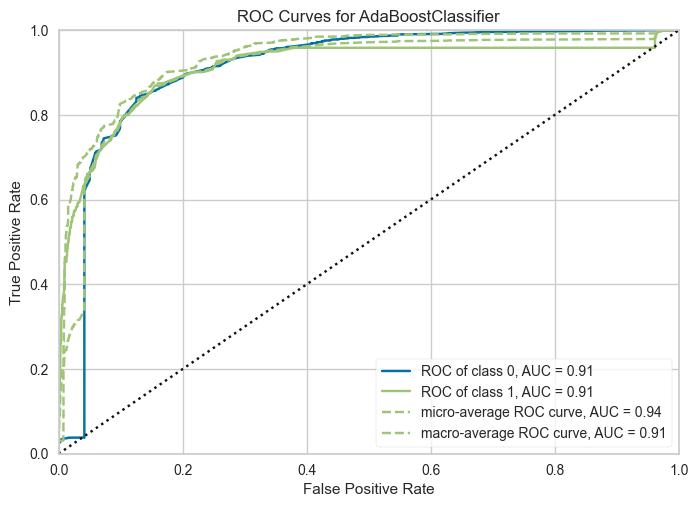

In [19]:
plot_model(ada, plot='auc')

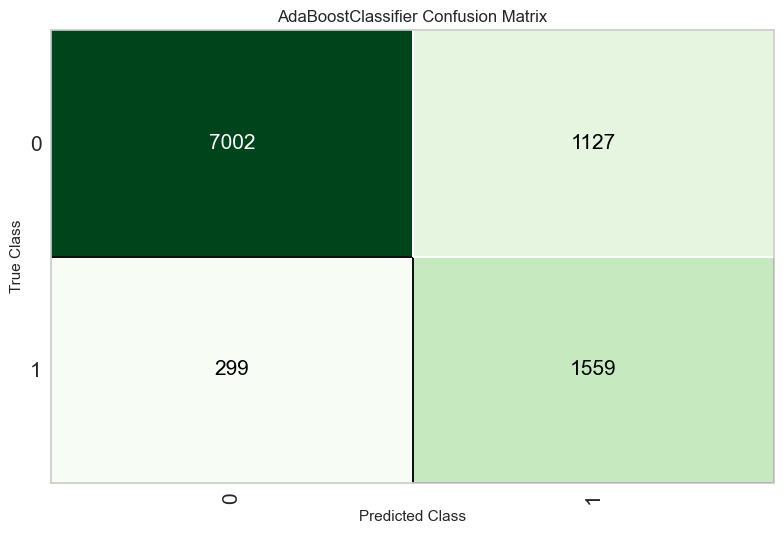

In [20]:
plot_model(ada, plot='confusion_matrix')

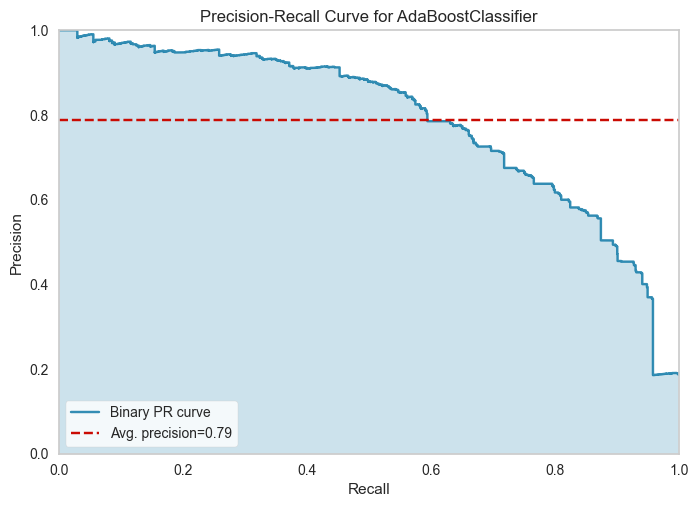

In [21]:
plot_model(ada, plot='pr')

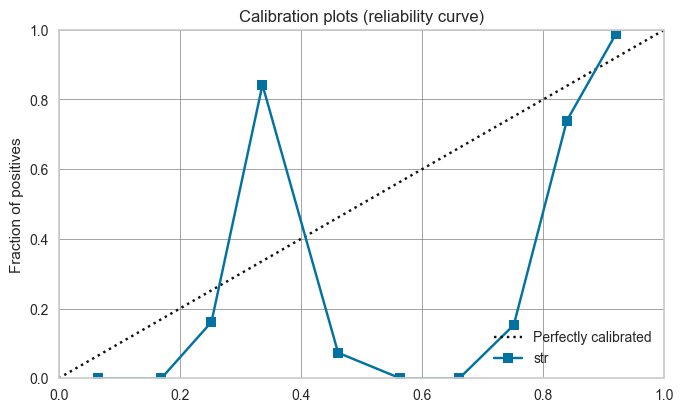

In [22]:
plot_model(ada, plot='calibration')

In [29]:
# check the final params of best model
best.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 123,
 'splitter': 'best'}

In [24]:
save_model(model=ada, model_name='ada_allianz')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=C:\Users\lluri\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['ID', 'count', 'Paid',
                                              'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
                                              'DAYS_EMPLOYED', 'FLAG_MOBIL',
                                              'FLAG_WORK_PHONE', 'FLAG_PHONE',
                                              'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
                                              'Main_ID', 'New_ID'],
                                     transformer=SimpleImputer(add_indicator=Fa...
                                                                                          reg_alpha=0.0,
                                                                                          reg_lambda=0.0,
                                                                                      

In [26]:
new_prediction = predict_model(ada, data=df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,str,0.8900,0.9619,0.8753,0.6522,0.7475,0.6791,0.6911


In [27]:
new_prediction.head()

,ID,count,Paid,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DAYS_BIRTH_CLEAN,Letter,Main_ID,New_ID,ADDRESS,target,prediction_label,prediction_score
0,5008804,15,13.0,M,Y,Y,0.0,427500.0,Working,Higher education,...,Laborers,2.0,09/04/1990,L,5008804,5008804,"06042, CT, 31 Mitchell Road",1,1,0.5019
1,5008804,15,13.0,F,N,Y,1.0,90000.0,State servant,Secondary / secondary special,...,Medicine staff,3.0,07/06/1984,L,5008804,5008804,"06042, CT, 31 Mitchell Road",1,0,0.5056
2,5008805,14,12.0,M,Y,Y,0.0,427500.0,Working,Higher education,...,Laborers,2.0,09/04/1990,G,5008805,5008805,"72703, AR, 1189 Northwest End Avenue",1,1,0.5625
3,5008805,14,12.0,M,N,Y,0.0,180000.0,Working,Higher education,...,Sales staff,2.0,21/02/1995,G,5008805,5008805,"72703, AR, 1189 Northwest End Avenue",1,1,0.5685
4,5008806,14,7.0,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,...,Security staff,2.0,06/05/1964,D,5008806,5008806,"72701, AR, 218 Shipley Alley",0,0,0.5056


In [33]:
def RankScore(input_score_df,nm_score,targetname,bins):
    input_score_df['score'] = input_score_df[nm_score]
    input_score_df['rank'] = pd.cut(input_score_df[nm_score], bins, labels=False)
    df7 = input_score_df.groupby('rank').agg({targetname: np.mean, 'rank': np.size})
    df7['id_ranks']=df7.index
    df7['tx_evento']=df7[targetname]
    df7['qt_rank']=df7['rank']
    df7 = df7.drop(['rank',targetname],axis=1)
    df7 = df7.reset_index()
    df_ord_score = df7.drop(['rank'],axis=1)
    return df_ord_score
df_rank= RankScore(new_prediction, 'prediction_score', 'target', bins=6)

In [34]:
df_rank

,id_ranks,tx_evento,qt_rank
0,0,0.215760,26548
1,1,0.043266,5316
2,2,0.556391,399
3,3,0.043636,275
4,4,0.000000,716
5,5,0.000000,33


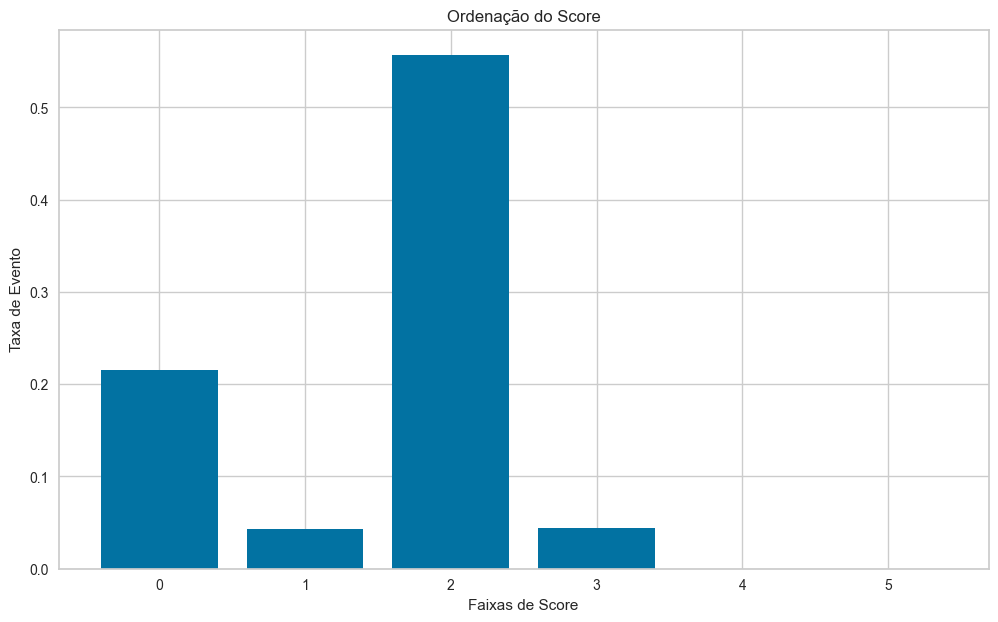

In [35]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt

# Make a random dataset:
height = df_rank.tx_evento
bars = df_rank.id_ranks
y_pos = np.arange(len(bars))

plt.figure(figsize=(12, 7))
plt.rcParams.update({'font.size': 15})
# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)

# setting label of y-axis
plt.ylabel("Taxa de Evento")

# setting label of x-axis
plt.xlabel("Faixas de Score")
plt.title("Ordenação do Score")

# Show graphic
plt.show()

In [37]:
df_rank

,id_ranks,tx_evento,qt_rank
0,0,0.215760,26548
1,1,0.043266,5316
2,2,0.556391,399
3,3,0.043636,275
4,4,0.000000,716
5,5,0.000000,33


In [36]:
X = df.drop(columns=['target'], axis=1)
y = df['target']

In [55]:
df = pd.read_csv('Datathon_VF.csv')

In [62]:
df.drop(columns=[''])

,ID,count,Paid,Ratio,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,...,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DAYS_BIRTH_CLEAN,Letter,Main_ID,New_ID,ADDRESS,zip_code,Target,target
0,5008804,15,13.0,0.866667,0.0,1.0,1.0,0.0,427500.0,Working,...,NaN,2.0,1990-09-04,L,5008804,5008804,"06042, CT, 31 Mitchell Road",6042,1,1
1,5008804,15,13.0,0.866667,1.0,0.0,1.0,1.0,90000.0,State servant,...,Medicine staff,3.0,1984-07-06,L,5008804,5008804,"06042, CT, 31 Mitchell Road",6042,1,1
2,5008805,14,12.0,0.857143,0.0,1.0,1.0,0.0,427500.0,Working,...,NaN,2.0,1990-09-04,G,5008805,5008805,"72703, AR, 1189 Northwest End Avenue",72703,1,1
3,5008805,14,12.0,0.857143,0.0,0.0,1.0,0.0,180000.0,Working,...,Sales staff,2.0,1995-02-21,G,5008805,5008805,"72703, AR, 1189 Northwest End Avenue",72703,1,1
4,5008806,14,7.0,0.500000,0.0,1.0,1.0,0.0,112500.0,Working,...,Security staff,2.0,1964-06-05,D,5008806,5008806,"72701, AR, 218 Shipley Alley",72701,0,0


In [57]:
def umbral(row):
    if row['Ratio'] >= 0.8:
        return 1
    else:
        return 0

df['target'] = df.apply(lambda row: umbral(row), axis=1)

In [58]:
X = df.drop(columns=['target'], axis=1)
y = df['target']

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=.2, random_state=2)

In [63]:
df.dtypes

ID                       int64
count                    int64
Paid                   float64
Ratio                  float64
CODE_GENDER            float64
FLAG_OWN_CAR           float64
FLAG_OWN_REALTY        float64
CNT_CHILDREN           float64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_EMPLOYED          float64
FLAG_MOBIL             float64
FLAG_WORK_PHONE        float64
FLAG_PHONE             float64
FLAG_EMAIL             float64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
DAYS_BIRTH_CLEAN        object
Letter                  object
Main_ID                  int64
New_ID                   int64
ADDRESS                 object
zip_code                 int64
Target                   int64
target                   int64
dtype: object

In [73]:
df['CNT_FAM_MEMBERS'].value_counts()

2.0     17444
1.0      6260
3.0      5621
4.0      2775
5.0       356
6.0        48
7.0        14
15.0        3
9.0         2
20.0        1
Name: CNT_FAM_MEMBERS, dtype: int64

In [60]:
print(X.shape, X_train.shape, X_test.shape)

(33287, 27) (26629, 27) (6658, 27)


In [61]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth =3, random_state = 42)
clf.fit(X_train, Y_train)

ValueError: could not convert string to float: 'State servant'

In [ ]:
fig = px.histogram(df1, x ="Age", color='CODE_GENDER', template='plotly_white') #marker_color=colors)
fig.update_layout(title="Age Distribution", xaxis_title="Age", yaxis_title="Frequency", template = 'plotly_dark',)
fig.show()

In [ ]:
# Create a DataFrame for plotting total frequencies
data = pd.DataFrame({"Class": labels, "Label": "Positive", "Value": freq_pos})
# Append negative frequency values to the DataFrame
data = data.append([{"Class": labels[l], "Label": "Negative", "Value": v} for l,v in enumerate(freq_neg)], ignore_index=True)
plt.xticks(rotation=90)
f = sns.barplot(x="Class", y="Value", hue="Label" ,data=data)